In [34]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

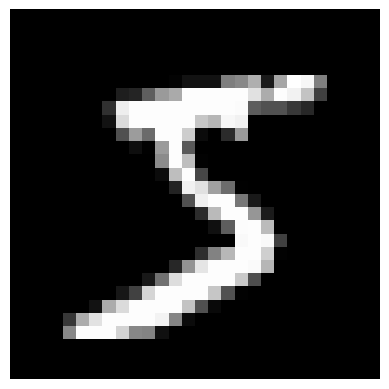

In [35]:
import matplotlib.pyplot as plt

img, label = train_dataset[0]
print(img)
print(img.shape)
print(label)

plt.figure()
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

In [36]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [45]:

class CNNModel(nn.Module):
    def _init_(self):
        super(CNNModel, self)._init_()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.act1 = nn.Sigmoid()

        #pool 1
        self.pool1 = nn.AvgPool2d(kernel_size=2,stride=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.act2 = nn.Sigmoid()

        #pool 2
        self.pool2 = nn.AvgPool2d(kernel_size=2,stride=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.act3 = nn.Sigmoid()
        
        self.fc2 = nn.Linear(120,84)
        self.act4 = nn.Sigmoid()
        
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        
        # input: x, size (num_img, 28, 28)
        
        # Convolution 1
        # O = (28 - 5 + 2*2)/ 1 + 1 = 28
        # output: size (num_img, 6, 28, 28)
        out = self.cnn1(x)
        out = self.act1(out)

        #pool 1
        # O = (28)/2= 14
        # output: size (num_img, 6, 14, 14)
        out = self.pool1(out)

        # Convolution 2
        # O = (14 - 5)/ 1 + 1 = 10
        # output: size (num_img, 16, 10, 10)
        out = self.cnn2(out)
        out = self.act2(out)
        

        #pool 2
        # O = 10 / 2 = 5
        # output: size (num_img, 16, 5, 5)
        out = self.pool2(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.act3(out)
        
        out = self.fc2(out)
        out = self.act4(out)
        
        out = self.fc3(out)
        return out

In [46]:
model = CNNModel()

In [47]:
criterion = nn.CrossEntropyLoss()

In [49]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

ValueError: optimizer got an empty parameter list

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)
                #print(outputs.size())
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))